In [92]:
#### Sentiment Analysis for Twitter
#### Importing required libraries
#### Dataset Source: CCT


In [4]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings
import re
import string
import nltk

In [5]:
df = pd.read_csv('ProjectTweets.csv')

In [6]:
# Read the CSV file with specified column names
column_names = ['id', 'date', 'no_query', 'name', 'Tweet']

df = pd.read_csv('ProjectTweets.csv', header=None, names=column_names)

# Print the DataFrame to verify the changes
print(df)

                 id                          date  no_query             name  \
0        1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1        1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2        1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3        1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4        1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   
...             ...                           ...       ...              ...   
1599995  2193601966  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY  AmandaMarie1028   
1599996  2193601969  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY      TheWDBoards   
1599997  2193601991  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY           bpbabe   
1599998  2193602064  Tue Jun 16 08:40:49 PDT 2009  NO_QUERY     tinydiamondz   
1599999  2193602129  Tue Jun 16 08:40:50 PDT 2009  NO_QUERY   RyanTrevMorris   

                                       

In [96]:
df.head()

,id,date,no_query,name,Tweet
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [11]:
def cleanUpTweet(txt):
  txt = re.sub(r'@[A-Aa-z0-9_]+','', txt)
  txt= re.sub(r'#', '', txt)
  txt = re.sub(r'RT) : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
  return txt

In [98]:
df.sample(2)

,id,date,no_query,name,Tweet
372951,2050891324,Fri Jun 05 19:28:51 PDT 2009,NO_QUERY,grcygrl94,so i feel like i completely wasted a day...i b...
1123689,1974545285,Sat May 30 13:21:05 PDT 2009,NO_QUERY,realerika,Almost got run over by a lady with a walker an...


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600000 entries, 0 to 1599999
Data columns (total 5 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   id        1600000 non-null  int64 
 1   date      1600000 non-null  object
 2   no_query  1600000 non-null  object
 3   name      1600000 non-null  object
 4   Tweet     1600000 non-null  object
dtypes: int64(1), object(4)
memory usage: 73.2+ MB


In [100]:
print(df.columns)

Index(['id', 'date', 'no_query', 'name', 'Tweet'], dtype='object')


Exploratory Data Analysis (EDA) involves visualizing the data through various types of plots to derive insights. This approach is beneficial for identifying patterns or relationships within the dataset.

In [12]:
pip install textblob

In [13]:
from textblob import TextBlob

In [14]:
#expression own believes
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

In [15]:
#expression emotions
def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [105]:
df['Subjectivity']=df['Tweet'].apply(getTextSubjectivity)

In [106]:
df['Polarity']=df['Tweet'].apply(getTextPolarity)

In [107]:
df.head(5)

,id,date,no_query,name,Tweet,Subjectivity,Polarity
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0.633333,0.216667
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0.000000,0.000000
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0.500000,0.500000
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0.400000,0.200000
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",1.000000,-0.625000


In [16]:
#delete all columns has non tweets
df = df.drop(df[df['Tweet']==''].index)

In [ ]:
df.head()

In [17]:
#after that we will get text analysis, if polarity value less than 0 then its a negative sentiment, equal to 0 is neutral sentiment, greater than 0 is positive sentiment
def getTextAnalysis(a):
  if a<0:
    return 'Negative'
  elif a==0:
    return 'Neutral'
  else:
    return 'Positive'

In [110]:
#we will create another column to pass the polarity to apply text analysis
#once it is applied it will save the negative, neutral, or positive value in score column
df['Score']=df['Polarity'].apply(getTextAnalysis)

In [ ]:
df.head(5)

,id,date,no_query,name,Tweet,Subjectivity,Polarity,Score
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0.633333,0.216667,Positive
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0.000000,0.000000,Neutral
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0.500000,0.500000,Positive
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0.400000,0.200000,Positive
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",1.000000,-0.625000,Negative


In [ ]:
#as we see this tweet has 0.633333 polarity so the result at last column is positive
#0	1467810369	Mon Apr 06 22:19:45 PDT 2009	NO_QUERY	_TheSpecialOne_	@switchfoot http://twitpic.com/2y1zl - Awww, t...	0.633333	0.216667	Positive

In [ ]:
#this tweet polarity is 0 which means neutral as its given in the last column
#1	1467810672	Mon Apr 06 22:19:49 PDT 2009	NO_QUERY	scotthamilton	is upset that he can't update his Facebook by ...	0.000000	0.000000	Neutral

In [111]:
#calculte positive percentage
positive=df[df['Score']=='Positive']
print(str(positive.shape[0]/df.shape[0]*100)+'% of positive tweets')
pos=positive.shape[0]/df.shape[0]*100

43.625437500000004% of positive tweets


43.625437500000004% of positive tweets

In [112]:
#calculte negative percentage
negative=df[df['Score']=='Negative']
print(str(negative.shape[0]/df.shape[0]*100)+'% of Negative tweets')
neg=negative.shape[0]/df.shape[0]*100

20.829375% of Negative tweets


20.829375% of negative tweets

In [113]:
#calculte neutral percentage
neutral=df[df['Score']=='Neutral']
print(str(neutral.shape[0]/df.shape[0]*100)+'% of Neutral tweets')
neutral1=neutral.shape[0]/df.shape[0]*100

35.5451875% of Neutral tweets


35.5451875% of Neutral tweets

In [114]:
#we can explode pie chart
explode=(0,0.1,0)
labels='Positive','Negative','Neutral'
sizes=[pos,neg,neutral1]
colors=['yellowgreen','lightcoral','gold']

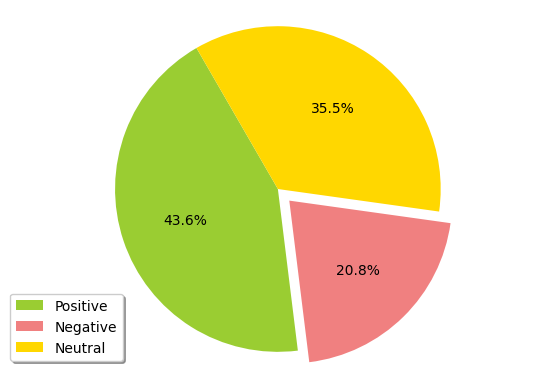

In [115]:
#now we can plot pie using matplotlib
plt.pie(sizes,explode=explode,colors=colors,autopct='%1.1f%%',startangle=120)
#call legend function to have labels
plt.legend(labels,loc=(-0.05,0.05),shadow=True)
plt.axis('equal')
#save the figures
plt.savefig('Sentiment_Analysis.png')

In [18]:
labels = df.groupby('Score').count().index.values
values=df.groupby('Score').size().values
plt.bar(labels,values)

KeyError: ignored

In [19]:
for index, row in df.iterrows():
    if row['Score']=='Positive':
        plt.scatter(row['Polarity'],row['Subjectivity'],color='green')
    elif row['Score']=='Negative':
      plt.scatter(row['Polarity'],row['Subjectivity'],color='red')
    elif row['Score']=='Neutral':
      plt.scatter(row['Polarity'],row['Subjectivity'],color='blue')
plt.title('Twitter Sentimment Analysis')
plt.xlabel('Polarity')
plt.ylabel('subjectivity')
plt.show()


KeyError: ignored

In [20]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags

In [119]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['Tweet'][df['label']==0])

KeyError: ignored

In [21]:
# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['Tweet'][df['label']==1])

KeyError: ignored

Input Split is a preliminary step in the preprocessing pipeline, aimed at either selecting or extracting features from words. This process transforms words into vectors, enabling the machine to comprehend and process the information effectively.

In [7]:
# feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['Tweet'])

In [8]:
#Extraction of the data into vectors for training and testing


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(bow, df['Tweet'], random_state=42, test_size=0.25)


 i will employ the Logistic Regression model for training; however, you have the flexibility to choose and use other models according to your preference.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [ ]:
# training
model = LogisticRegression()
model.fit(x_train, y_train)

In [2]:
# testing
pred = model.predict(x_test)
score = f1_score(y_test, pred)
print("F1 Score:", score)



NameError: ignored

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
# use probability to get output
pred_prob = model.predict_proba(x_test)
pred = pred_prob[:, 1] >= 0.3
pred = pred.astype(np.int)

f1_score(y_test, pred)

In [ ]:
accuracy_score(y_test,pred)

In [ ]:
pred_prob[0][1] >= 0.3

Closing Remarks:
Text-based data presents a challenge for machines, requiring conversion into numerical form for effective processing. Streamlining and refining text can lead to cleaner data, yielding improved outcomes in analysis.

The flexibility to employ various machine learning models of your choice allows for meaningful comparisons.

In this project tutorial, we delved into the Twitter Sentiment Analysis dataset, treating it as a classification machine learning project. Through preprocessing and exploration using diverse plots, tweets were categorized as either expressing negative or positive sentiment. Additionally, we examined the prevalence of keywords within the dataset, providing valuable insights into sentiment patterns.

In [3]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Tweet'])
sequences = tokenizer.texts_to_sequences(df['Tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df['Tweet'], random_state=42, test_size=0.25)

# Model Training
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=16, input_length=100))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32)

# Testing
pred_prob = model.predict(x_test)
pred = (pred_prob >= 0.3).astype(np.int)

# Performance metrics
f1 = f1_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print("F1 Score:", f1)
print("Accuracy Score:", accuracy)


NameError: ignored

In [7]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score


tokenizer = Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Tweet'])
sequences = tokenizer.texts_to_sequences(df['Tweet'])
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(padded_sequences, df['Tweet'], random_state=42, test_size=0.25)

# Model Training
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim=16, input_length=100))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=32)

# Testing
pred_prob = model.predict(x_test)
pred = (pred_prob >= 0.3).astype(np.int)

# Performance metrics
f1 = f1_score(y_test, pred)
accuracy = accuracy_score(y_test, pred)

print("F1 Score:", f1)
print("Accuracy Score:", accuracy)


Epoch 1/5


UnimplementedError: ignored